In [7]:
import rdkit
from rdkit import Chem
import pandas as pd
import json
import ast
import matplotlib.pyplot as plt
import sklearn


Data loading

In [4]:
df = pd.read_csv('MatDX_EF.csv')

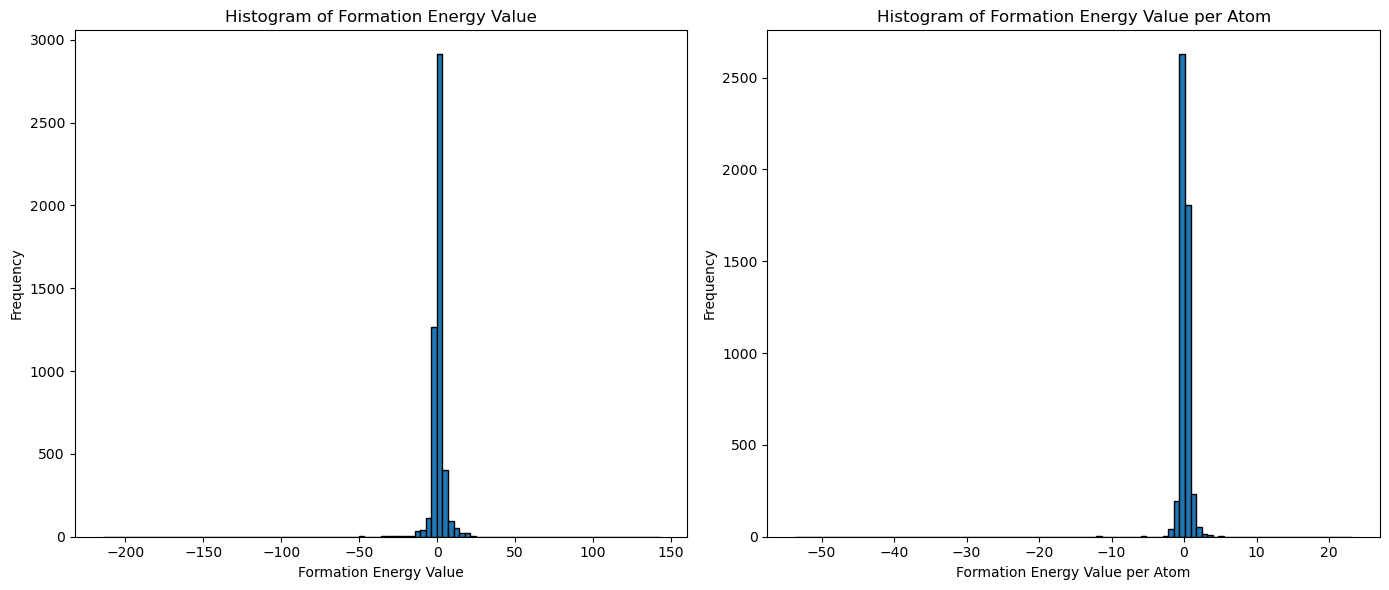

In [7]:
# Assuming df is already loaded and contains 'formation_energy' column with dictionary-like string data

# Convert 'formation_energy' column from string to dictionary if needed
df['formation_energy'] = df['formation_energy'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Extract 'value' and 'value_per_atom' from 'formation_energy' column
df['formation_energy_value'] = df['formation_energy'].apply(lambda x: x.get('value') if isinstance(x, dict) else None)
df['formation_energy_value_per_atom'] = df['formation_energy'].apply(lambda x: x.get('value_per_atom') if isinstance(x, dict) else None)

# Drop any NaN values in the 'formation_energy_value' and 'formation_energy_value_per_atom' columns
values = df['formation_energy_value'].dropna()
values_per_atom = df['formation_energy_value_per_atom'].dropna()

# Plot histograms for 'value' and 'value_per_atom'
plt.figure(figsize=(14, 6))

# Histogram for 'formation_energy_value'
plt.subplot(1, 2, 1)
plt.hist(values, bins=100, edgecolor='black')
plt.xlabel('Formation Energy Value')
plt.ylabel('Frequency')
plt.title('Histogram of Formation Energy Value')

# Histogram for 'formation_energy_value_per_atom'
plt.subplot(1, 2, 2)
plt.hist(values_per_atom, bins=100, edgecolor='black')
plt.xlabel('Formation Energy Value per Atom')
plt.ylabel('Frequency')
plt.title('Histogram of Formation Energy Value per Atom')

plt.tight_layout()
plt.show()

Filtering to remove datapoints having more than +-5 eV for formation energy per atom

In [20]:
df['formation_energy'] = df['formation_energy'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Extract 'value' and 'value_per_atom' from 'formation_energy' column
df['formation_energy_value'] = df['formation_energy'].apply(lambda x: x.get('value') if isinstance(x, dict) else None)
df['formation_energy_value_per_atom'] = df['formation_energy'].apply(lambda x: x.get('value_per_atom') if isinstance(x, dict) else None)

# Remove rows where 'formation_energy_value_per_atom' is outside the range of -5 to 5
df_cleaned = df[(df['formation_energy_value_per_atom'] <= 5) & (df['formation_energy_value_per_atom'] >= -5)].reset_index(drop=True)


# Save the cleaned DataFrame to an Excel file
df_cleaned.to_csv('MatDX_EF_cleaned.csv', index=False)

# Display the cleaned DataFrame
df_cleaned

,original_index,formula,space_group,structure,id,formation_energy,formation_energy_value,formation_energy_value_per_atom
0,0,Ni4Ta6,R-3c,"[{'data': {'a': [-6.910143e-10, 0, 0], 'b': [3...",PN_MCKVEQNTJFRUHOURCR2HCEB35KDFRETL,{'reference': {'Ni': 'https://nomad-lab.eu/pro...,1.017402,0.101740
1,1,Mn4Sb2,I4_1/amd,"[{'data': {'a': [-1.87778212e-10, 1.87604249e-...",PN_FGGHB2NFWUCYD3YZO4FWN3QVOKCTVI6K,{'reference': {'Mn': 'https://nomad-lab.eu/pro...,2.975885,0.495981
2,2,Ir2Na2,Imma,"[{'data': {'a': [-1.36776653e-10, 2.60817299e-...",PN_BAO7ZSBZZCMA7PH7QMR7WLDI72GOELND,{'reference': {'Na': 'https://nomad-lab.eu/pro...,1.888520,0.472130
3,3,MoSm,R-3m,"[{'data': {'a': [1.65820251e-10, 9.57363439999...",PN_4YR2JLVZHJLC3F2TYPTOVDBJJ52C6XIE,{'reference': {'Mo': 'https://nomad-lab.eu/pro...,1.022825,0.511413
4,4,Sn17P12,I-43m,"[{'data': {'a': [-5.563178910000001e-10, 5.563...",PN_H6P36AVAKDU244QNQGGCJ7YLC4A4F2YE,{'reference': {'P': 'https://nomad-lab.eu/prod...,6.236779,0.215061
...,...,...,...,...,...,...,...,...
4977,4977,Ag3Br,P4/mmm,"[{'data': {'a': [3.54083755e-10, 0, 0], 'b': [...",PN_GGP4J67ICWQHYNTSDBZQJFBJKFHKP2TY,{'reference': {'Br': 'https://nomad-lab.eu/pro...,-0.186508,-0.046627
4978,4978,Al16Ge8,Fd-3m,"[{'data': {'a': [0, 6.01749067e-10, 6.01749067...",PN_HZ6TO4YLVA2K7PWWHZJRSFEAYOZLE3WF,{'reference': {'Al': 'https://nomad-lab.eu/pro...,4.803874,0.200161
4979,4979,Pt2Th2,Cmcm,"[{'data': {'a': [-3.93770842e-10, 0, 0], 'b': ...",PN_5CPW22CGT4NOR6246BCGTZUO2UMDXXWI,{'reference': {'Th': 'https://nomad-lab.eu/pro...,-4.940262,-1.235066
4980,4980,Ga5Sr,Cmmm,"[{'data': {'a': [2.2508728800000003e-10, -6.32...",PN_Y33JSPVMM6O4AYYYNR2LHUUT5WFVXJJC,{'reference': {'Ga': 'https://nomad-lab.eu/pro...,-1.094989,-0.182498


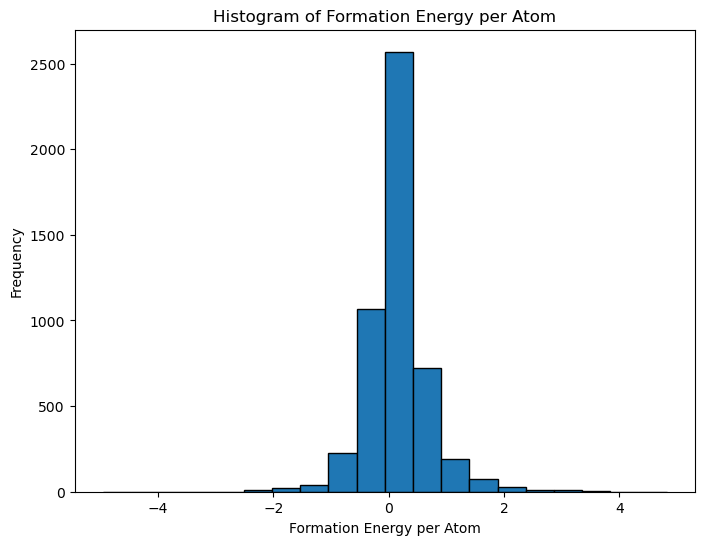

In [26]:
# Plotting the histogram of formation_energy_per_atom_std with the filtered data
plt.figure(figsize=(8, 6))
plt.hist(df_cleaned['formation_energy_value_per_atom'].dropna(), bins=20, edgecolor='black')
plt.xlabel('Formation Energy per Atom')
plt.ylabel('Frequency')
plt.title('Histogram of Formation Energy per Atom')
plt.show()

Get average value for multiple datapoints

In [28]:
# Group by 'formula' and 'space_group' to calculate the mean of 'formation_energy_value' and 'formation_energy_value_per_atom'
# This will also handle cases with only one data point per group
df_averaged = df_cleaned.groupby(['formula', 'space_group']).agg(
    formation_energy_value=('formation_energy_value', 'mean'),
    formation_energy_value_per_atom=('formation_energy_value_per_atom', 'mean')
).reset_index()


# Save the cleaned DataFrame to an Excel file
df_averaged.to_csv('MatDX_EF_averaged.csv', index=False)


# Display the resulting DataFrame
df_averaged

,formula,space_group,formation_energy_value,formation_energy_value_per_atom
0,Ac2Al6,P6_3/mmc,-3.133457,-0.391682
1,Ac3Fe,Fm-3m,2.871004,0.717751
2,Ac3I,Pm-3m,-0.937452,-0.234363
3,Ac3Yb,Fm-3m,0.193414,0.048353
4,Ac4Bi6,R-3c,-3.278293,-0.327829
...,...,...,...,...
4159,WSb4,Im-3m,3.066436,0.613287
4160,YbBi,F-43m,-0.283886,-0.141943
4161,YbBr,Fm-3m,-2.837811,-1.418905
4162,YbGe,P4/mmm,-1.660215,-0.830107


In [38]:
# Adjusted code to extract individual atomic elements from each formula in 'df_averaged'

# Example assumption: Each formula contains elements and their counts (like 'Al2O3')
# This code assumes formulas follow a standard chemical notation (e.g., 'H2O', 'Al2O3')

import re

# Initialize an empty set for unique atoms
unique_atoms = set()

# Regular expression to capture element symbols (capital letter followed by optional lowercase letters)
element_pattern = re.compile(r'([A-Z][a-z]?)')

# Extract elements from each formula
for formula in df_averaged['formula']:
    atoms_in_formula = element_pattern.findall(formula)
    unique_atoms.update(atoms_in_formula)

# Convert set to a sorted list
unique_atoms_list = sorted(unique_atoms)

# Extract unique space groups
unique_space_groups_list = sorted(df_averaged['space_group'].unique())

print(unique_space_groups_list)
print()

['Amm2', 'C2', 'C2/m', 'Cc', 'Ccce', 'Cccm', 'Cm', 'Cmc2_1', 'Cmce', 'Cmcm', 'Cmm2', 'Cmme', 'Cmmm', 'F-43m', 'Fd-3m', 'Fdd2', 'Fddd', 'Fm-3c', 'Fm-3m', 'Fmmm', 'I-43d', 'I-43m', 'I23', 'I4/m', 'I4/mcm', 'I4/mmm', 'I4_1/a', 'I4_1/acd', 'I4_1/amd', 'I4cm', 'I4mm', 'Im-3', 'Im-3m', 'Imm2', 'Imma', 'Immm', 'P-1', 'P-31m', 'P-3c1', 'P-3m1', 'P-43m', 'P-43n', 'P-62m', 'P-6m2', 'P1', 'P2/m', 'P2_1/c', 'P2_1/m', 'P2_12_12_1', 'P2_13', 'P3_121', 'P3m1', 'P4/mbm', 'P4/mmm', 'P4/nmm', 'P4_2/mnm', 'P4_2/n', 'P4mm', 'P6/mmm', 'P6_3/m', 'P6_3/mcm', 'P6_3/mmc', 'P6_3mc', 'Pa-3', 'Pbam', 'Pbcm', 'Pm', 'Pm-3m', 'Pm-3n', 'Pmm2', 'Pmma', 'Pmmm', 'Pmmn', 'Pnma', 'Pnna', 'Pnnm', 'R-3c', 'R-3m']



9:1 split

The same formula goes to the same split. (formula-based split to avoid any kind of data leakage)

In [32]:
from sklearn.model_selection import train_test_split

# Group by 'formula' and use group-based train-test split
# This will ensure that the same 'formula' doesn't appear in both train and test sets
unique_formulas = df_averaged['formula'].unique()
train_formulas, test_formulas = train_test_split(unique_formulas, test_size=0.1, random_state=42)

# Split df_averaged based on the formula groups
train_df = df_averaged[df_averaged['formula'].isin(train_formulas)].reset_index(drop=True)
test_df = df_averaged[df_averaged['formula'].isin(test_formulas)].reset_index(drop=True)

# Display the size of each set

train_df.to_csv('split/train.csv', index=False)
test_df.to_csv('split/test.csv', index=False)


train_df.shape, test_df.shape


((3757, 4), (407, 4))

Check unique

In [ ]:
unique_elements = set()
for formula in df_cleaned['formula']:
    # Extract elements based on uppercase letters followed by lowercase letters or numbers
    elements = [part for part in formula if part.isalpha()]
    unique_elements.update(elements)

# Count unique elements and unique space groups
num_unique_elements = len(unique_elements)
num_unique_space_groups = df_cleaned['space_group'].nunique()

num_unique_formula = df_cleaned['formula'].nunique()

num_unique_elements, num_unique_space_groups, num_unique_formula

(35, 78, 3277)

In [13]:
# Sample code to identify how many examples in 'df' have the same 'formula' but different 'space_group'

# Group by 'formula' and check unique 'space_group' counts for each group
duplicates_with_different_space_group = df_cleaned.groupby('formula')['space_group'].nunique()

# Filter to find cases where there is more than one unique 'space_group' for the same 'formula'
duplicates_count = (duplicates_with_different_space_group > 1).sum()

duplicates_count


np.int64(683)

In [16]:
# Reset index to keep track of original indices
df_cleaned = df_cleaned.reset_index().rename(columns={'index': 'original_index'})

# Count occurrences of each (formula, space_group) pair to find exact duplicates
duplicate_pairs = df.groupby(['formula', 'space_group']).size()
exact_duplicates = duplicate_pairs[duplicate_pairs > 1].reset_index(name='count')

# Filter the original DataFrame to include only exact duplicate pairs and keep original indices
duplicate_df = df_cleaned.merge(exact_duplicates[['formula', 'space_group']], on=['formula', 'space_group'])

# Convert 'formation_energy' from string to dictionary if needed
duplicate_df['formation_energy'] = duplicate_df['formation_energy'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Extract 'value' and 'value_per_atom' from the 'formation_energy' dictionary
duplicate_df['formation_energy_value'] = duplicate_df['formation_energy'].apply(lambda x: x.get('value') if isinstance(x, dict) else None)
duplicate_df['formation_energy_value_per_atom'] = duplicate_df['formation_energy'].apply(lambda x: x.get('value_per_atom') if isinstance(x, dict) else None)

# Convert extracted columns to numeric, forcing non-numeric values to NaN
duplicate_df['formation_energy_value'] = pd.to_numeric(duplicate_df['formation_energy_value'], errors='coerce')
duplicate_df['formation_energy_value_per_atom'] = pd.to_numeric(duplicate_df['formation_energy_value_per_atom'], errors='coerce')

# Check if conversion was successful
print("Data types after conversion:")
print(duplicate_df[['formation_energy_value', 'formation_energy_value_per_atom']].dtypes)
print("\nAny NaN values in 'formation_energy_value':", duplicate_df['formation_energy_value'].isna().any())
print("Any NaN values in 'formation_energy_value_per_atom':", duplicate_df['formation_energy_value_per_atom'].isna().any())

# Now proceed with aggregation, assuming data types are now clean
stats = duplicate_df.groupby(['formula', 'space_group']).agg(
    unique_value_count=('formation_energy_value', 'nunique'),
    datapoint_count=('formation_energy_value', 'size'),
    formation_energy_mean=('formation_energy_value', 'mean'),
    formation_energy_std=('formation_energy_value', 'std'),
    formation_energy_per_atom_mean=('formation_energy_value_per_atom', 'mean'),
    formation_energy_per_atom_std=('formation_energy_value_per_atom', 'std'),
    original_indices=('original_index', list)
).reset_index()

# Display the final result
stats

Data types after conversion:
formation_energy_value             float64
formation_energy_value_per_atom    float64
dtype: object

Any NaN values in 'formation_energy_value': False
Any NaN values in 'formation_energy_value_per_atom': False


,formula,space_group,unique_value_count,datapoint_count,formation_energy_mean,formation_energy_std,formation_energy_per_atom_mean,formation_energy_per_atom_std,original_indices
0,Ac4Br6,R-3c,2,2,-14.694957,0.102140,-1.469496,0.010214,"[583, 3818]"
1,Ac4I6,R-3c,2,2,-11.355718,0.142808,-1.135572,0.014281,"[14, 1019]"
2,AcAl3,I4/mmm,2,2,-0.090564,0.008318,-0.022641,0.002079,"[1832, 1959]"
3,AcMn,P4/mmm,2,2,0.760808,0.090197,0.380404,0.045098,"[81, 253]"
4,Ag2Al,I4/mmm,2,2,-0.186167,0.000004,-0.062056,0.000001,"[570, 1000]"
...,...,...,...,...,...,...,...,...,...
645,WBr,Cmmm,2,2,2.609098,0.004551,1.304549,0.002276,"[3031, 4502]"
646,WP3,Fm-3m,2,2,1.559718,0.003170,0.389930,0.000792,"[1926, 2052]"
647,WSb,Pm-3m,4,4,1.915868,0.741730,0.638169,0.004431,"[242, 1095, 2109, 2448]"
648,YbBr,Fm-3m,2,2,-2.837811,0.023230,-1.418905,0.011615,"[3104, 3114]"


After standarization

In [12]:
df_std = pd.read_csv('data/MatDX_EF_cleaned_Std.csv')
df_std

,original_index,formula,space_group,structure,id,formation_energy,formation_energy_value,formation_energy_value_per_atom,Standardized_formation_energy_value,Standardized_formation_energy_value_per_atom
0,0,Ni4Ta6,R-3c,"[{'data': {'a': [-6.910143e-10, 0, 0], 'b': [3...",PN_MCKVEQNTJFRUHOURCR2HCEB35KDFRETL,{'reference': {'Ni': 'https://nomad-lab.eu/pro...,1.017402,0.101740,0.082175,-0.069831
1,1,Mn4Sb2,I4_1/amd,"[{'data': {'a': [-1.87778212e-10, 1.87604249e-...",PN_FGGHB2NFWUCYD3YZO4FWN3QVOKCTVI6K,{'reference': {'Mn': 'https://nomad-lab.eu/pro...,2.975885,0.495981,0.513845,0.646453
2,2,Ir2Na2,Imma,"[{'data': {'a': [-1.36776653e-10, 2.60817299e-...",PN_BAO7ZSBZZCMA7PH7QMR7WLDI72GOELND,{'reference': {'Na': 'https://nomad-lab.eu/pro...,1.888520,0.472130,0.274179,0.603119
3,3,MoSm,R-3m,"[{'data': {'a': [1.65820251e-10, 9.57363439999...",PN_4YR2JLVZHJLC3F2TYPTOVDBJJ52C6XIE,{'reference': {'Mo': 'https://nomad-lab.eu/pro...,1.022825,0.511413,0.083370,0.674490
4,4,Sn17P12,I-43m,"[{'data': {'a': [-5.563178910000001e-10, 5.563...",PN_H6P36AVAKDU244QNQGGCJ7YLC4A4F2YE,{'reference': {'P': 'https://nomad-lab.eu/prod...,6.236779,0.215061,1.232581,0.136058
...,...,...,...,...,...,...,...,...,...,...
4977,4977,Ag3Br,P4/mmm,"[{'data': {'a': [3.54083755e-10, 0, 0], 'b': [...",PN_GGP4J67ICWQHYNTSDBZQJFBJKFHKP2TY,{'reference': {'Br': 'https://nomad-lab.eu/pro...,-0.186508,-0.046627,-0.183180,-0.339395
4978,4978,Al16Ge8,Fd-3m,"[{'data': {'a': [0, 6.01749067e-10, 6.01749067...",PN_HZ6TO4YLVA2K7PWWHZJRSFEAYOZLE3WF,{'reference': {'Al': 'https://nomad-lab.eu/pro...,4.803874,0.200161,0.916754,0.108987
4979,4979,Pt2Th2,Cmcm,"[{'data': {'a': [-3.93770842e-10, 0, 0], 'b': ...",PN_5CPW22CGT4NOR6246BCGTZUO2UMDXXWI,{'reference': {'Th': 'https://nomad-lab.eu/pro...,-4.940262,-1.235066,-1.230958,-2.498633
4980,4980,Ga5Sr,Cmmm,"[{'data': {'a': [2.2508728800000003e-10, -6.32...",PN_Y33JSPVMM6O4AYYYNR2LHUUT5WFVXJJC,{'reference': {'Ga': 'https://nomad-lab.eu/pro...,-1.094989,-0.182498,-0.383419,-0.586255


In [13]:
# Group by 'formula' and 'space_group' to calculate the mean of 'formation_energy_value' and 'formation_energy_value_per_atom'
# This will also handle cases with only one data point per group
df_averaged_std = df_std.groupby(['formula', 'space_group']).agg(
    formation_energy_value=('Standardized_formation_energy_value', 'mean'),
    formation_energy_value_per_atom=('Standardized_formation_energy_value_per_atom', 'mean')
).reset_index()


# Save the cleaned DataFrame to an Excel file
df_averaged_std.to_csv('data/MatDX_EF_averaged_std.csv', index=False)


# Display the resulting DataFrame
df_averaged_std

,formula,space_group,formation_energy_value,formation_energy_value_per_atom
0,Ac2Al6,P6_3/mmc,-0.832719,-0.966316
1,Ac3Fe,Fm-3m,0.490729,1.049380
2,Ac3I,Pm-3m,-0.348696,-0.680487
3,Ac3Yb,Fm-3m,-0.099441,-0.166828
4,Ac4Bi6,R-3c,-0.864642,-0.850303
...,...,...,...,...
4159,WSb4,Im-3m,0.533804,0.859583
4160,YbBi,F-43m,-0.204643,-0.512572
4161,YbBr,Fm-3m,-0.767555,-2.832647
4162,YbGe,P4/mmm,-0.508000,-1.762877


In [14]:
from sklearn.model_selection import train_test_split

# Group by 'formula' and use group-based train-test split
# This will ensure that the same 'formula' doesn't appear in both train and test sets
unique_formulas = df_averaged_std['formula'].unique()
train_formulas, test_formulas = train_test_split(unique_formulas, test_size=0.1, random_state=42)

# Split df_averaged_std based on the formula groups
train_df = df_averaged_std[df_averaged_std['formula'].isin(train_formulas)].reset_index(drop=True)
test_df = df_averaged_std[df_averaged_std['formula'].isin(test_formulas)].reset_index(drop=True)

# Display the size of each set

train_df.to_csv('split/train.csv', index=False)
test_df.to_csv('split/test.csv', index=False)


train_df.shape, test_df.shape


((3757, 4), (407, 4))